# Calculate NDVI for Planet Imagery

+ load in data
+ calc ndvi

#### NDVI and NDRE calc for first image 
#### second set of images (planet_order_480642) not done
still need to work out how to do the second set of files


In [1]:
#load libraries 
import os                              # a base python package for doing basic operations
import sys                             # a base python package for doing system-related operations
import numpy as np                     # numpy is a numeric python library 
import matplotlib.pyplot as plt        # the basic python plotting library
import rasterio as rio                 # a raster operation package - good for remote sensing data!
import pandas as pd                    # a data analysis library
import geopandas as gpd                # spatial data analysis (built on top of pandas)
import seaborn as sns                  # another graphing package - nicer graphs
import sklearn                         # a machine learning package
import gdal

from pandas.plotting import scatter_matrix
from rasterio.merge import merge
import glob
from rasterio.plot import show

In [2]:
# specify the folder and the file
#change folder to your local folder for the file below
work_folder = r'D:\2020\GISC425\Untitled Folder\SatelliteData\OneDrive_1_5-14-2020\planet_order_480658\20200225_214824_6022005_RapidEye-4'
pfls_image_filename = '6022005_2020-02-25_RE4_3A_Analytic.tif'
#join these together to get the full path
ffin = os.path.join(work_folder, pfls_image_filename)

#make sure the path exists
print(os.path.exists(ffin))

#open the file with rasterio. We read the information from this file into an "object" called "src"
src = rio.open(ffin)
print("src :",src)



True
src : <open DatasetReader name='D:\2020\GISC425\Untitled Folder\SatelliteData\OneDrive_1_5-14-2020\planet_order_480658\20200225_214824_6022005_RapidEye-4\6022005_2020-02-25_RE4_3A_Analytic.tif' mode='r'>


In [3]:
src.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 5000, 'height': 5000, 'count': 5, 'crs': CRS.from_epsg(32760), 'transform': Affine(5.0, 0.0, 259500.0,
       0.0, -5.0, 5920500.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}

In [4]:
# read the opened file into an array
arr = src.read()
#check array dimenswions
arr.shape

(5, 5000, 5000)

In [5]:
#assign value in array to what it represents
arr.shape
nbands = arr.shape[0]
nrows = arr.shape[1]
ncols = arr.shape[2]

In [6]:
#assign name to bands to tell them apart easier
#Blue (0.4750), Green  (0.550), Red (0.6575), RE (0.7100), NIR (0.8050)
#0                   1            2            3              4

blue=arr[0,:]/1
green=arr[1,:]/1
red=arr[2,:]/1
RE=arr[3,:]/1
NIR=arr[4,:]/1

C:\Users\kiwij\Anaconda3\envs\g425\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


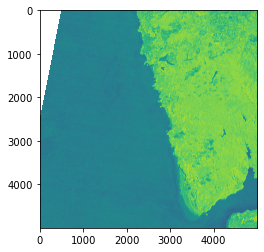

In [7]:
#calc NDRE

NDRE=(NIR-RE)/(NIR+RE)
plt.imshow(NDRE)

C:\Users\kiwij\Anaconda3\envs\g425\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


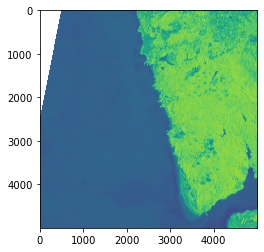

In [8]:
#calc ndvi
NDVI=(NIR-red)/(NIR+red)
plt.imshow(NDVI)

# using the other planet images


In [9]:
#load images
# specify the folder and the file
### make sure all your tif files are in one folder and then replace code below with your file path
work_folder = r'D:\2020\GISC425\Untitled Folder\SatelliteData\OneDrive_1_5-14-2020\planet_order_480642\tifIMAGEfiles'
#image1
image_filenameA = '20200501_213424_0f46_3B_AnalyticMS.tif'
#join these together to get the full path
A = os.path.join(work_folder, image_filenameA)
#image2
image_filenameB = '20200501_213424_1_0f46_3B_AnalyticMS.tif'
#join these together to get the full path
B = os.path.join(work_folder, image_filenameB)
#image3
image_filenameC = '20200501_213425_0f46_3B_AnalyticMS.tif'
#join these together to get the full path
C = os.path.join(work_folder, image_filenameC)
#image4 
image_filenameD = '20200501_213426_0f46_3B_AnalyticMS.tif'
#join these together to get the full path
D = os.path.join(work_folder, image_filenameD)


#make sure the path exists
print(os.path.exists(ffin))

#open the file with rasterio. We read the information from this file into an "object" called "src"
srcA = rio.open(A)
srcB = rio.open(B)
srcC = rio.open(C)
srcD = rio.open(D)



True


In [10]:
# read the opened file into an array
arrA = srcA.read()
#check array dimenswions
arrA.shape
# read the opened file into an array
arrB = srcB.read()
#check array dimenswions
arrB.shape
# read the opened file into an array
arrC = srcC.read()
#check array dimenswions
arrC.shape
# read the opened file into an array
arrD = srcD.read()
#check array dimenswions
arrD.shape

(4, 4317, 8448)

In [11]:
arrB.shape

(4, 4329, 8454)

In [12]:
#assign value in array to what it represents
arrA.shape
nbandsA = arrA.shape[0]
nrowsA = arrA.shape[1]
ncolsA = arrA.shape[2]
#assign value in array to what it represents
arrB.shape
nbandsB = arrB.shape[0]
nrowsB = arrB.shape[1]
ncolsB = arrB.shape[2]
#assign value in array to what it represents
arrC.shape
nbandsC = arrC.shape[0]
nrowsC = arrC.shape[1]
ncolsC = arrC.shape[2]
#assign value in array to what it represents
arrD.shape
nbandsD = arrD.shape[0]
nrowsD = arrD.shape[1]
ncolsD = arrD.shape[2]

In [14]:
#assign variable
blueA=arrA[0,:]/1
greenA=arrA[1,:]/1
redA=arrA[2,:]/1
NIRA=arrA[3,:]/1





MemoryError: Unable to allocate 279. MiB for an array with shape (4326, 8447) and data type float64

In [ ]:
blueB=arrB[0,:]/1
greenB=arrB[1,:]/1
redB=arrB[2,:]/1
NIRB=arrB[3,:]/1


blueC=arrC[0,:]/1
greenC=arrC[1,:]/1
redC=arrC[2,:]/1
NIRC=arrC[3,:]/1

blueD=arrD[0,:]/1
greenD=arrD[1,:]/1
redD=arrD[2,:]/1
NIRD=arrD[3,:]/1

In [ ]:
dirpath = r"D:\2020\GISC425\Untitled Folder\SatelliteData\OneDrive_1_5-14-2020\planet_order_480642\tifIMAGEfiles"

# Make a search criteria to select the DEM files
search_criteria = "2*.tif"

q = os.path.join(dirpath, search_criteria)
print(q)

image = glob.glob(q)

image

In [ ]:
src_files_to_mosaic1 = []

In [ ]:
src_files_to_mosaic1

In [ ]:
for fp in image:
    src1 = rio.open(fp)
    src_files_to_mosaic1.append(src1)
src_files_to_mosaic1

In [ ]:
mosaic, out_trans = merge(src_files_to_mosaic1)

In [ ]:
show(mosaic, cmap='terrain')

In [ ]:
# read the opened file into an array
arr1 = mosaic.read()
#check array dimenswions
arr1.shape

In [ ]:
mosaic